# Entrenamiento de red ResNet para clasificación de signo a texto.

---
---

# Índice.

- [Configuración](#configuración)
  - [Configuración de la red](#configuración-de-la-red)
  - [Dispositivo](#dispositivo-en-el-que-se-ejecuta-la-red)
- [Carga de datos](#carga-de-datos)
- [Entrenamiento](#entrenamiento)
  - [Creación del modelo](#creacion-del-modelo-a-entrenar)
  - [Entrenamiento](#entrenamiento)
  - [Gráfica de costes](#plot-de-los-costes-según-el-epoch)
- [Prueba](#prueba)
  - [Comprobando accuracy en batch](#comprobando-accuracy-en-un-batch)
  - [Comprobando una etiqueta específica](#comprobando-una-etiqueta-en-concreto)
- [Exportamos modelo](#exportamos-modelo)

## Configuración

---

In [1]:
%matplotlib inline

### Hiperparámetros de la red

In [2]:
from config.const import (
    LEARNING_RATE,
    BATCH_SIZE,
    NUM_EPOCHS,
    TRAIN_SPLIT,
    IMAGE_SIZE,
    WIDTH_MULTIPLIER,
)

In [3]:
print(
    f"LEARNING_RATE: {LEARNING_RATE}. BATCH_SIZE: {BATCH_SIZE}. NUM_EPOCHS: {NUM_EPOCHS}. TRAIN_SPLIT: {TRAIN_SPLIT}. IMAGE_SIZE: {IMAGE_SIZE}. NUMBER OF CONCATENATED IMAGES: {WIDTH_MULTIPLIER}"
)

LEARNING_RATE: 0.001. BATCH_SIZE: 128. NUM_EPOCHS: 25. TRAIN_SPLIT: 0.7. IMAGE_SIZE: 224. NUMBER OF CONCATENATED IMAGES: 1


### Configuración de torch.

In [4]:
from config.torch_config import get_device, get_transform

d:\Proyectos\TFG\Sign2Text\Project\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
device = get_device()
print(f"Device: {device}")

Device: cuda


#### Configuración del transform.

In [6]:
single_image_transform = get_transform(IMAGE_SIZE, WIDTH_MULTIPLIER)
single_image_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
)

### Elección del dataset

In [7]:
from config.dataset import get_dataset_info, get_datasets

In [8]:
datasets = get_datasets()
print("Available local datasets: ")
datasets

Available local datasets: 


{'WLASL': {'name': 'WLASL_frames', 'path': 'WLASL/frames'},
 'animals': {'name': 'animals', 'path': 'animals/all'},
 'signs': {'name': 'signs', 'path': 'signs'}}

In [9]:
DATASET = "animals"
data_path, model_path = get_dataset_info(DATASET)
print(f"Dataset: {DATASET}. Data path: {data_path}. Model path: {model_path}")

Dataset: animals. Data path: d:\Proyectos\TFG\Sign2Text\Project\data\animals\all. Model path: d:\Proyectos\TFG\Sign2Text\Project\models\resnet_animals.pth


## Carga de datos

---

In [10]:
from utils.loader import split_dataset, get_dataset

### Se carga el dataset

In [11]:
dataset, classes = get_dataset(data_path, single_image_transform)

print(f"Some classes in dataset: {classes[:5]}")

Some classes in dataset: ['butterfly', 'cat', 'chicken', 'cow', 'dog']


### Ejemplo de entrada y salida del dataset

In [12]:
from utils.output import show_image
from numpy.random import randint

Target of image is: 'human'


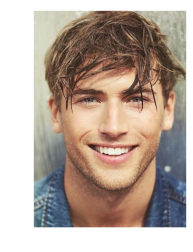

In [13]:
rand_index = randint(0, len(dataset))
img, target = dataset.imgs[rand_index]

print(f"Target of image is: '{classes[target]}'")
show_image(img)

### Divide el dataset en entrenamiento y test

In [14]:
train_loader, test_loader = split_dataset(dataset, TRAIN_SPLIT, BATCH_SIZE)

print(
    f"Number of batches for tranning: {len(train_loader)}. Number of batches for testing: {len(test_loader)}. ({BATCH_SIZE} images/batch)"
)

Number of batches for tranning: 156. Number of batches for testing: 67. (128 images/batch)


#### Comprueba el balance de los datos

In [15]:
import sys

sys.path.append("../")
from common.utils.check_accuracy import check_accuracy
from common.utils.balance import check_balance_status

In [16]:
info = check_balance_status(train_loader, classes)
print(info)

[('butterfly', 1475), ('cat', 1189), ('chicken', 2151), ('cow', 1310), ('dog', 3374), ('elephant', 1022), ('horse', 1853), ('human', 1554), ('sheep', 1284), ('spider', 3368), ('squirrle', 1294)]


In [17]:
info = check_balance_status(test_loader, classes)
print(info)

[('butterfly', 637), ('cat', 479), ('chicken', 947), ('cow', 556), ('dog', 1489), ('elephant', 424), ('horse', 770), ('human', 659), ('sheep', 536), ('spider', 1453), ('squirrle', 568)]


## Entrenamiento

---

### Creación del model a entrenar


In [18]:
from lib.model import create_model

In [19]:
num_classes = len(classes)
model = create_model(num_classes)

### Entrenamiento

In [20]:
from lib.train import train_model

In [21]:
costs = train_model(
    model,
    train_loader=train_loader,
    device=device,
    learning_rate=LEARNING_RATE,
    num_epochs=NUM_EPOCHS,
)

Training on device: cuda
Cost at epoch 1 is 0.55148
Cost at epoch 2 is 0.19704
Cost at epoch 3 is 0.16146
Cost at epoch 4 is 0.14425
Cost at epoch 5 is 0.13245
Cost at epoch 6 is 0.12367
Cost at epoch 7 is 0.11853
Cost at epoch 8 is 0.11410
Cost at epoch 9 is 0.11018
Cost at epoch 10 is 0.10468
Cost at epoch 11 is 0.10354
Cost at epoch 12 is 0.09932
Cost at epoch 13 is 0.09711
Cost at epoch 14 is 0.09404
Cost at epoch 15 is 0.09383
Cost at epoch 16 is 0.09313
Cost at epoch 17 is 0.08973
Cost at epoch 18 is 0.08741
Cost at epoch 19 is 0.08380
Cost at epoch 20 is 0.08563
Cost at epoch 21 is 0.08345
Cost at epoch 22 is 0.08114
Cost at epoch 23 is 0.08143
Cost at epoch 24 is 0.07894
Cost at epoch 25 is 0.08017


### Plot de los costes según el epoch

In [22]:
from utils.output import plot_costs

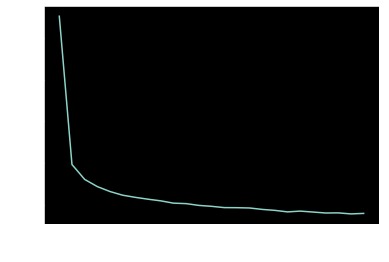

In [23]:
plot_costs(costs)

## Prueba

---

In [24]:
from lib.test import predict_class


### Comprobando accuracy en un batch

In [25]:
print("Checking accuracy on TRAIN set batch")
check_accuracy(train_loader, model, classes, device)

Checking accuracy on TRAIN set batch
Predictions for batch 1 
['butterfly', 'dog', 'sheep', 'squirrle', 'dog', 'spider', 'human', 'dog', 'dog', 'cat', 'spider', 'butterfly', 'dog', 'spider', 'dog', 'dog', 'dog', 'dog', 'dog', 'squirrle', 'cat', 'cow', 'cow', 'spider', 'squirrle', 'chicken', 'horse', 'cow', 'spider', 'horse', 'horse', 'squirrle', 'dog', 'chicken', 'squirrle', 'spider', 'cat', 'horse', 'chicken', 'horse', 'cat', 'chicken', 'elephant', 'chicken', 'dog', 'butterfly', 'human', 'spider', 'cow', 'cow', 'spider', 'spider', 'chicken', 'human', 'dog', 'dog', 'spider', 'chicken', 'butterfly', 'spider', 'dog', 'spider', 'dog', 'spider', 'horse', 'chicken', 'horse', 'spider', 'dog', 'spider', 'spider', 'dog', 'spider', 'sheep', 'dog', 'chicken', 'spider', 'chicken', 'cow', 'chicken', 'sheep', 'spider', 'horse', 'horse', 'butterfly', 'sheep', 'dog', 'chicken', 'horse', 'squirrle', 'sheep', 'elephant', 'cow', 'horse', 'dog', 'horse', 'spider', 'human', 'human', 'dog', 'horse', 'chick

In [26]:
print("Checking accuracy on TEST set batch")
check_accuracy(test_loader, model, classes, device)

Checking accuracy on TEST set batch
Predictions for batch 1 
['cat', 'human', 'spider', 'horse', 'spider', 'squirrle', 'cow', 'elephant', 'spider', 'butterfly', 'dog', 'sheep', 'squirrle', 'spider', 'sheep', 'chicken', 'cow', 'sheep', 'chicken', 'spider', 'dog', 'human', 'sheep', 'chicken', 'elephant', 'spider', 'spider', 'spider', 'spider', 'dog', 'horse', 'cow', 'cat', 'chicken', 'cow', 'dog', 'sheep', 'cow', 'chicken', 'horse', 'chicken', 'spider', 'spider', 'spider', 'butterfly', 'spider', 'butterfly', 'cow', 'chicken', 'human', 'dog', 'cow', 'chicken', 'butterfly', 'spider', 'chicken', 'cat', 'cow', 'spider', 'elephant', 'squirrle', 'spider', 'cow', 'horse', 'dog', 'horse', 'butterfly', 'squirrle', 'cow', 'dog', 'squirrle', 'spider', 'cat', 'horse', 'dog', 'spider', 'human', 'dog', 'elephant', 'horse', 'squirrle', 'cow', 'butterfly', 'dog', 'sheep', 'spider', 'human', 'elephant', 'spider', 'human', 'butterfly', 'horse', 'spider', 'dog', 'chicken', 'sheep', 'squirrle', 'horse', 'co

### Comprobando una etiqueta en concreto

In [27]:
label = "fall in love"

In [28]:
print(f"Prediction for {label} and TRAIN set")
predict_class(train_loader, model, classes, label, device)

Prediction for fall in love and TRAIN set


In [29]:
print(f"Prediction for {label} and TEST set")
predict_class(test_loader, model, classes, label, device)

Prediction for fall in love and TEST set


## Exportamos modelo

---

In [30]:
from lib.model import export_model

In [31]:
export_model(model, model_path)
print(f"Model exported to {model_path}")

Model exported to d:\Proyectos\TFG\Sign2Text\Project\models\resnet_animals.pth
